In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

# Bi-variate linear regression

# 1.1. Basic approach - least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is linear:
$$
y=w_1 x + w_0.
$$
Admitting that the model's accuracy is not be absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $b$ given a training set of $\{(x_i, y_i), i=1..N\}$. Usually the objetive is to find $w=(w_1,w_0)$ providing the best possible fit of the model, i.e. minimizing absolute values of the errors
$\varepsilon_i=x_i-w_1 y_i-w_0$.

Most common quality function for the given model is the residual sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w_1 x_i-w_0)^2. \hspace{5ex} (2)
$$
Minimizing $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (3)
$$
Luckily this problem has a precise analytic solution following from function's shape and local extremum criteria:
$$
\left\{\begin{array}{c}\frac{\partial RSS(\hat{w})}{\partial w_1}=0,\\ \frac{\partial RSS(\hat{w})}{\partial w_0}=0.\end{array}\right.
$$
i.e.
$$
\left\{\begin{array}{c}\sum\limits_i 2x_i(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\\ \sum\limits_i 2(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1\left(\sum\limits_i (x_i)^2\right)+\hat{w}_0\left(\sum\limits_i x_i\right)=\sum\limits_i x_i y_i,\\ \hat{w}_1\left(\sum\limits_i x_i\right)+N \hat{w}_0=\sum\limits_i y_i,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[X-E[X]][Y-E[X]]}{var[X]}=\frac{cov(X,Y)}{var[X]}=corr[X,Y]\frac{std[Y]}{std[X]},\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}=E[Y]-E[X]\hat{w}_1\end{array}\right.
$$

# 1.2. Probabilistic approach

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (4)
$$

This way it is actually the mean of the distribution (4) which is predicted by a linear model/
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (4). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization (3). Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$

### Example One: Toy example.
$y=5x+10+\varepsilon$

$\varepsilon\sim{\cal N}(0,\sigma^2)$ and $\sigma=10$

In [2]:
#Generate data:
np.random.seed(100)
error=np.random.normal(0,10,10)
X=range(10)

In [3]:
error

array([-17.49765473,   3.42680403,  11.53035803,  -2.52436037,
         9.81320787,   5.14218841,   2.21179669, -10.70043331,
        -1.89495831,   2.55001444])

In [4]:
X

range(0, 10)

#### (1) Let's generate y and prepare the data for using

In [6]:
#1. What is the type of X,error?
print (type(X))
print (type(error))

<class 'range'>
<class 'numpy.ndarray'>


In [7]:
#2. Change the type of X, to np array
X=np.asarray(X)

In [9]:
print (type(X))
print (type(error))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
#3.Generate y
y=5*X+10+error
y

array([ -7.49765473,  18.42680403,  31.53035803,  22.47563963,
        39.81320787,  40.14218841,  42.21179669,  34.29956669,
        48.10504169,  57.55001444])

In [11]:
# Pandas Data frame
#1.Make the pandas dataframe.
data=pd.DataFrame([list(X),list(y)]).T
data.head(3)

,0,1
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358


In [12]:
#2. Change the name for column 0 and 1
data.columns=["x","y"]
data

,x,y
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358
3,3.0,22.475640
4,4.0,39.813208
5,5.0,40.142188
6,6.0,42.211797
7,7.0,34.299567
8,8.0,48.105042
9,9.0,57.550014


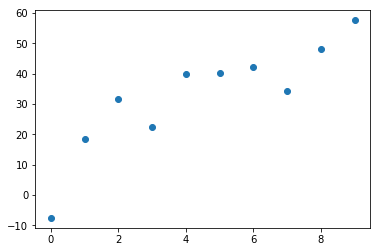

In [13]:
#visulize the data.
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(data.x,data.y)
plt.show()

#### (2) Use OLS to estimate the coefficients by hands

In [14]:
#Take a quick look at the data
data.describe()

,x,y
count,10.00000,10.000000
mean,4.50000,32.705696
std,3.02765,18.194432
min,0.00000,-7.497655
25%,2.25000,24.739319
50%,4.50000,37.056387
75%,6.75000,41.694395
max,9.00000,57.550014


#### Correlation. Very important for linear model. If you don't know what is it, check:https://en.wikipedia.org/wiki/Correlation_and_dependence 

In [15]:
#Take a look the correlation of X and y
data.corr()

,x,y
x,1.000000,0.873941
y,0.873941,1.000000


In [16]:
#Calculate the model coefficients. We have closed form for it by OLS.

$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}\end{array}\right.
$$

In [17]:
#2.1 get xy and x-squred term 
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
data.head(3)

,x,y,x_sqr,xy
0,0.0,-7.497655,0.0,-0.000000
1,1.0,18.426804,1.0,18.426804
2,2.0,31.530358,4.0,63.060716


In [18]:
#2.2 Let's calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 5.251879886236957


In [19]:
#2.3 let's calculate w0.
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 9.072236788697676


In [20]:
#2.4. Let's get predicted values and errors
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head(3)

,x,y,x_sqr,xy,pred,err
0,0.0,-7.497655,0.0,-0.000000,9.072237,-16.569892
1,1.0,18.426804,1.0,18.426804,14.324117,4.102687
2,2.0,31.530358,4.0,63.060716,19.575997,11.954361


In [21]:
#2.5. Calculate R-squared.
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

0.7637724875971592

#### (3)Let's try package from statsmodels to double check our answer

In [22]:
lm = smf.ols(formula='y ~ x', data = data).fit()

In [25]:
print (lm.params)
print (lm.rsquared)

Intercept    9.072237
x            5.251880
dtype: float64
0.763772487597


In [26]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     25.87
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           0.000946
Time:                        19:39:44   Log-Likelihood:                -35.459
No. Observations:                  10   AIC:                             74.92
Df Residuals:                       8   BIC:                             75.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.0722      5.513      1.646      0.1

/Users/baileygriswold/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


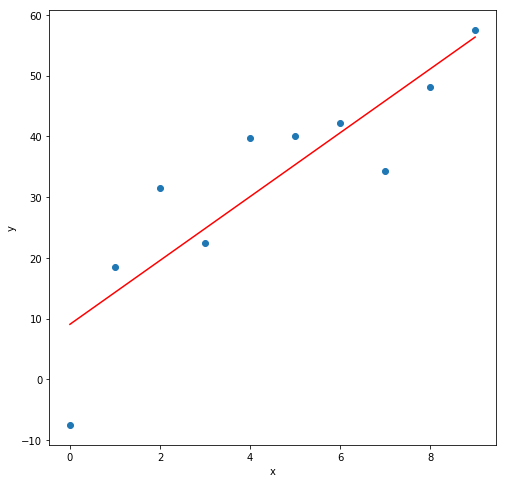

In [27]:
#7. Visualize the model 
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(data.x,data.pred,c="r")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
Xn=(X-X.mean())/X.std()

In [29]:
Xn

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

In [30]:
yn=(y-y.mean())/y.std()
yn

array([-2.32917704, -0.82724616, -0.0680931 , -0.59267729,  0.41177296,
        0.43083241,  0.55073496,  0.09234072,  0.8921595 ,  1.43935304])

In [31]:
dataN=pd.DataFrame([list(Xn),list(yn)]).T
dataN.columns=["x","y"]
dataN.head(3)

,x,y
0,-1.566699,-2.329177
1,-1.218544,-0.827246
2,-0.870388,-0.068093


In [32]:
lm = smf.ols(formula='y ~ x', data = dataN).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     25.87
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           0.000946
Time:                        19:40:05   Log-Likelihood:                -6.9746
No. Observations:                  10   AIC:                             17.95
Df Residuals:                       8   BIC:                             18.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8.327e-17      0.172  -4.85e-16      1.0

/Users/baileygriswold/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### Excerise 2. Real-world example. Real estate prices in NYC

#### q1. Real Estate Prices in NYC

This is the data on multi-apartment house sale prices in the zip code 10466 (Bronx). Let's see how sale price depends on the house size (besides other relevant parameters)

In [34]:
data_3=pd.read_csv("NYC_RE_10466__multi.csv",index_col=0)
data_3.index=range(len(data_3))
data_3.head()

,gross_sq_feet,sale_price
0,7745,700000.0
1,3700,335000.0
2,5250,510000.0
3,4082,285000.0
4,4082,198558.0


In [42]:
#Q0. What is the min/max of gross_sq_feet and sale_price?
print (data_3.describe())
print ('Gross Sq Ft Min: {}'.format(data_3['gross_sq_feet'].min()))
print ('Gross Sq Ft Max: {}'.format(data_3['gross_sq_feet'].max()))
print ('Sale Price Min: {}'.format(data_3['sale_price'].min()))
print ('Sale Price Max: {}'.format(data_3['sale_price'].max()))

       gross_sq_feet    sale_price
count     136.000000  1.360000e+02
mean    19734.764706  1.889870e+06
std     22391.028099  2.081844e+06
min      1620.000000  1.325000e+05
25%      4080.250000  4.800000e+05
50%      6577.500000  6.612500e+05
75%     37027.500000  3.328860e+06
max     84340.000000  8.865379e+06
Gross Sq Ft Min: 1620
Gross Sq Ft Max: 84340
Sale Price Min: 132500.0
Sale Price Max: 8865379.0


In [43]:
#Q1. What is the correlation of gross_sq_feet and sale_price?
data_3.corr()

,gross_sq_feet,sale_price
gross_sq_feet,1.000000,0.926478
sale_price,0.926478,1.000000


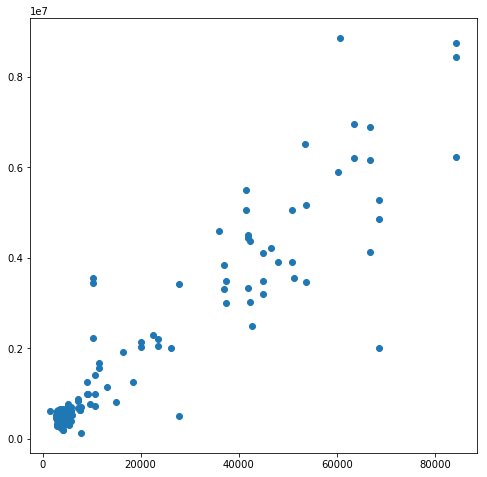

In [44]:
#Q2. Visualize the dataset as a scatterplot
plt.figure(figsize=(8,8))
plt.scatter(data_3.gross_sq_feet,data_3.sale_price)

In [49]:
#Q3. Run linear regression without intercept (add "-1" to the formulae)
lm3 = smf.ols(formula='sale_price ~ gross_sq_feet -1', data = data_3).fit()

In [50]:
print (lm3.params)
print (lm3.rsquared)

gross_sq_feet    90.365308
dtype: float64
0.920040202893


In [51]:
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1553.
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           6.28e-76
Time:                        19:51:50   Log-Likelihood:                -2040.4
No. Observations:                 136   AIC:                             4083.
Df Residuals:                     135   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
gross_sq_feet    90.3653      2.293     39.413

In [52]:
#Q4. Run linear regression with intercept
lm4 = smf.ols(formula='sale_price ~ gross_sq_feet', data = data_3).fit()

In [53]:
print (lm4.params)
print (lm4.rsquared)

Intercept        189900.25823
gross_sq_feet        86.14087
dtype: float64
0.858361460655


In [54]:
print (lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     812.1
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           9.99e-59
Time:                        19:52:42   Log-Likelihood:                -2038.2
No. Observations:                 136   AIC:                             4080.
Df Residuals:                     134   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.899e+05      9e+04      2.109

In [74]:
inputs = np.linspace?

In [89]:
import statsmodels as sm
inputs = np.linspace(data_3.gross_sq_feet.min(), data_3.gross_sq_feet.max(), num=100)
inputs = pd.DataFrame(inputs)
inputs = sm.tools.add_constant(inputs)

In [90]:
lm4.predict(exog=inputs)

PatsyError: Error evaluating factor: NameError: name 'gross_sq_feet' is not defined
    sale_price ~ gross_sq_feet
                 ^^^^^^^^^^^^^

In [88]:
inputs

array([[  1.00000000e+00,   1.62000000e+03],
       [  1.00000000e+00,   2.45555556e+03],
       [  1.00000000e+00,   3.29111111e+03],
       [  1.00000000e+00,   4.12666667e+03],
       [  1.00000000e+00,   4.96222222e+03],
       [  1.00000000e+00,   5.79777778e+03],
       [  1.00000000e+00,   6.63333333e+03],
       [  1.00000000e+00,   7.46888889e+03],
       [  1.00000000e+00,   8.30444444e+03],
       [  1.00000000e+00,   9.14000000e+03],
       [  1.00000000e+00,   9.97555556e+03],
       [  1.00000000e+00,   1.08111111e+04],
       [  1.00000000e+00,   1.16466667e+04],
       [  1.00000000e+00,   1.24822222e+04],
       [  1.00000000e+00,   1.33177778e+04],
       [  1.00000000e+00,   1.41533333e+04],
       [  1.00000000e+00,   1.49888889e+04],
       [  1.00000000e+00,   1.58244444e+04],
       [  1.00000000e+00,   1.66600000e+04],
       [  1.00000000e+00,   1.74955556e+04],
       [  1.00000000e+00,   1.83311111e+04],
       [  1.00000000e+00,   1.91666667e+04],
       [  

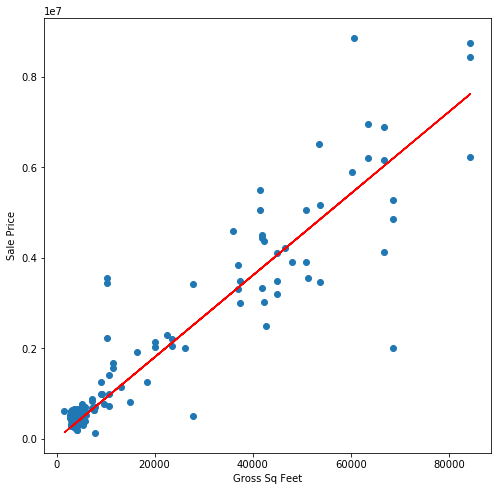

In [91]:
#Q5. Plot the predicted values, observations and the regression line (with intercept)
plt.figure(figsize=(8,8))
plt.scatter(x = data_3.gross_sq_feet,y = data_3.sale_price)
plt.plot(data_3.gross_sq_feet,lm3.predict(),c="r")
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.show()

# Excerise 3. Real-world example. Countries of the world

In [92]:
data_4=pd.read_csv("countries.csv",index_col=0)
data_4.head()

,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [32]:
#Q1. Find the top county by population, area, density, GDP per capita

In [33]:
#Q2. Find the average density by performing a regression of population vs area without an intercept

In [95]:
lm = smf.ols(formula='Population~Area_sqmi -1', data=data_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     78.73
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           2.21e-16
Time:                        20:21:29   Log-Likelihood:                -4513.1
No. Observations:                 227   AIC:                             9028.
Df Residuals:                     226   BIC:                             9032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Area_sqmi     32.6726      3.682      8.873      0.0